In [1]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc4


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
data = pd.read_csv ('/content/MARICO.NS.csv')
temp=pd.DataFrame(data, columns= ['Open','High','Low','Close','Adj Close','Volume']).dropna()
ON=np.array(temp.iloc[1:len(temp),0])
res=np.array(temp.iloc[11:len(temp),3])
temp.drop(temp.index[len(temp)-1], inplace=True)
temp.drop(columns=['Open'], inplace=True)
temp['ON']=ON
a1=np.array(temp.iloc[9:len(temp)-1])
a2=np.array(temp.iloc[8:len(temp)-2])
a3=np.array(temp.iloc[7:len(temp)-3])
a4=np.array(temp.iloc[6:len(temp)-4])
a5=np.array(temp.iloc[5:len(temp)-5])
a6=np.array(temp.iloc[4:len(temp)-6])
a7=np.array(temp.iloc[3:len(temp)-7])
a8=np.array(temp.iloc[2:len(temp)-8])
a9=np.array(temp.iloc[1:len(temp)-9])
a10=np.array(temp.iloc[0:len(temp)-10])
temp.drop(temp.index[0:10], inplace=True)

In [7]:
temp['O1'], temp['H1'], temp['L1'],temp['C1'], temp['AC1'], temp['V1'],temp['O2'], temp['H2'], temp['L2'],temp['C2'], temp['AC2'], temp['V2'],temp['O3'], temp['H3'], temp['L3'],temp['C3'], temp['AC3'], temp['V3'] = [a1[:,0],a1[:,1],a1[:,2],a1[:,3],a1[:,4],a1[:,5], a2[:,0],a2[:,1],a2[:,2],a2[:,3],a2[:,4],a2[:,5], a3[:,0],a3[:,1],a3[:,2],a3[:,3],a3[:,4],a3[:,5]]
temp['O4'], temp['H4'], temp['L4'],temp['C4'], temp['AC4'], temp['V4'],temp['O5'], temp['H5'], temp['L5'],temp['C5'], temp['AC5'], temp['V5'],temp['O6'], temp['H6'], temp['L6'],temp['C6'], temp['AC6'], temp['V6'] = [a4[:,0],a4[:,1],a4[:,2],a4[:,3],a4[:,4],a4[:,5], a5[:,0],a5[:,1],a5[:,2],a5[:,3],a5[:,4],a5[:,5], a6[:,0],a6[:,1],a6[:,2],a6[:,3],a6[:,4],a6[:,5]]
temp['O7'], temp['H7'], temp['L7'],temp['C7'], temp['AC7'], temp['V7'],temp['O8'], temp['H8'], temp['L8'],temp['C8'], temp['AC8'], temp['V8'],temp['O9'], temp['H9'], temp['L9'],temp['C9'], temp['AC9'], temp['V9'] = [a7[:,0],a7[:,1],a7[:,2],a7[:,3],a7[:,4],a7[:,5], a8[:,0],a8[:,1],a8[:,2],a8[:,3],a8[:,4],a8[:,5], a9[:,0],a9[:,1],a9[:,2],a9[:,3],a9[:,4],a9[:,5]]
temp['O10'], temp['H10'], temp['L10'],temp['C10'], temp['AC10'], temp['V10'], temp['result']=[a10[:,0],a10[:,1],a10[:,2],a10[:,3],a10[:,4],a10[:,5],res]
temp

,High,Low,Close,Adj Close,Volume,ON,O1,H1,L1,C1,AC1,V1,O2,H2,L2,C2,AC2,V2,O3,H3,L3,C3,AC3,V3,O4,H4,L4,C4,AC4,V4,O5,H5,L5,C5,AC5,V5,O6,H6,L6,C6,AC6,V6,O7,H7,L7,C7,AC7,V7,O8,H8,L8,C8,AC8,V8,O9,H9,L9,C9,AC9,V9,O10,H10,L10,C10,AC10,V10,result
12,1.911160,1.911160,1.911160,-0.000000,25838.0,1.911160,1.911160,1.911160,1.911160,-0.000000,38757.0,1.911160,1.911160,1.911160,1.911160,-0.000000,1808641.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,219621.0,1.911160,1.911160,1.865490,1.911160,-0.000000,697618.0,1.911160,1.911160,1.908060,1.910770,-0.000000,1744046.0,1.910770,1.911160,1.857750,1.911160,-0.000000,258377.0,1.911160,1.911160,1.911160,1.911160,-0.000000,167945.0,1.911160,1.911160,1.911160,1.911160,-0.000000,64594.0,1.911160,1.911160
13,1.911160,1.911160,1.911160,-0.000000,25838.0,1.911160,1.911160,1.911160,1.911160,-0.000000,25838.0,1.911160,1.911160,1.911160,1.911160,-0.000000,38757.0,1.911160,1.911160,1.911160,1.911160,-0.000000,1808641.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,219621.0,1.911160,1.911160,1.865490,1.911160,-0.000000,697618.0,1.911160,1.911160,1.908060,1.910770,-0.000000,1744046.0,1.910770,1.911160,1.857750,1.911160,-0.000000,258377.0,1.911160,1.911160,1.911160,1.911160,-0.000000,167945.0,1.911160,1.911160
14,1.911160,1.911160,1.911160,-0.000000,64594.0,1.911160,1.911160,1.911160,1.911160,-0.000000,25838.0,1.911160,1.911160,1.911160,1.911160,-0.000000,25838.0,1.911160,1.911160,1.911160,1.911160,-0.000000,38757.0,1.911160,1.911160,1.911160,1.911160,-0.000000,1808641.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,219621.0,1.911160,1.911160,1.865490,1.911160,-0.000000,697618.0,1.911160,1.911160,1.908060,1.910770,-0.000000,1744046.0,1.910770,1.911160,1.857750,1.911160,-0.000000,258377.0,1.911160,1.911160
15,1.911160,1.911160,1.911160,-0.000000,103351.0,1.911160,1.911160,1.911160,1.911160,-0.000000,64594.0,1.911160,1.911160,1.911160,1.911160,-0.000000,25838.0,1.911160,1.911160,1.911160,1.911160,-0.000000,25838.0,1.911160,1.911160,1.911160,1.911160,-0.000000,38757.0,1.911160,1.911160,1.911160,1.911160,-0.000000,1808641.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,219621.0,1.911160,1.911160,1.865490,1.911160,-0.000000,697618.0,1.911160,1.911160,1.908060,1.910770,-0.000000,1744046.0,1.910770,1.911160
16,1.911160,1.911160,1.911160,-0.000000,90432.0,1.911160,1.911160,1.911160,1.911160,-0.000000,103351.0,1.911160,1.911160,1.911160,1.911160,-0.000000,64594.0,1.911160,1.911160,1.911160,1.911160,-0.000000,25838.0,1.911160,1.911160,1.911160,1.911160,-0.000000,25838.0,1.911160,1.911160,1.911160,1.911160,-0.000000,38757.0,1.911160,1.911160,1.911160,1.911160,-0.000000,1808641.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,12919.0,1.911160,1.911160,1.911160,1.911160,-0.000000,219621.0,1.911160,1.911160,1.865490,1.911160,-0.000000,697618.0,1.911160,1.911160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,303.899994,295.000000,297.149994,297.149994,4969776.0,300.000000,309.549988,300.000000,306.100006,306.100006,3878958.0,303.899994,315.549988,300.000000,301.700012,301.700012,5360217.0,300.899994,311.000000,293.549988,308.850006,308.850006,2983604.0,309.000000,300.850006,293.000000,296.049988,296.049988,2306068.0,297.000000,307.950012,296.500000,300.350006,300.350006,3315004.0,300.000000,314.899994,298.649994,300.149

In [0]:
train_dataset = temp.sample(frac=0.9,random_state=0)
test_dataset = temp.drop(train_dataset.index)

In [9]:
train_stats = train_dataset.describe()
train_stats.pop("result")
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
High,4855.0,101.099861,1.203622e+02,1.682040,5.742300,36.659599,1.629750e+02,4.040000e+02
Low,4855.0,98.288093,1.174809e+02,1.602310,5.402950,34.455101,1.592875e+02,3.932500e+02
Close,4855.0,99.603664,1.188629e+02,1.656490,5.568295,35.198200,1.612500e+02,3.964500e+02
Adj Close,4855.0,91.614951,1.161764e+02,-0.004853,0.637320,29.103451,1.474134e+02,3.882819e+02
Volume,4855.0,903914.333677,1.588678e+06,0.000000,180864.000000,457907.000000,1.099972e+06,4.480969e+07
...,...,...,...,...,...,...,...,...
H10,4855.0,97.713748,1.171918e+02,1.602310,5.308520,34.207401,1.556000e+02,3.932500e+02
L10,4855.0,99.033952,1.185996e+02,1.656490,5.418625,34.678001,1.588125e+02,3.964500e+02
C10,4855.0,91.042818,1.158720e+02,-0.004853,0.560766,28.643717,1.447442e+02,3.882819e+02
AC10,4855.0,895633.679918,1.589125e+06,0.000000,178151.000000,454825.000000,1.096636e+06,4.480969e+07


In [0]:
train_labels = train_dataset.pop('result')
test_labels = test_dataset.pop('result')

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(150, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(150, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [13]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               10050     
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 32,851
Trainable params: 32,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.3385585 ],
       [-0.03672752],
       [ 0.22424799],
       [ 0.46645203],
       [ 0.30758852],
       [-0.05105282],
       [ 0.43483576],
       [ 0.14023767],
       [ 0.3314629 ],
       [ 0.42092833]], dtype=float32)

In [15]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:4680.7119,  mae:41.9044,  mse:4680.7119,  val_loss:1277.2104,  val_mae:27.2500,  val_mse:1277.2104,  
....................................................................................................
Epoch: 100, loss:17.7646,  mae:2.4462,  mse:17.7646,  val_loss:8.5912,  val_mae:1.6398,  val_mse:8.5912,  
....................................................................................................
Epoch: 200, loss:12.9420,  mae:2.0360,  mse:12.9420,  val_loss:15.2538,  val_mae:2.1940,  val_mse:15.2538,  
....................................................................................................
Epoch: 300, loss:11.8242,  mae:1.9327,  mse:11.8242,  val_loss:13.9988,  val_mae:2.1837,  val_mse:13.9988,  
....................................................................................................
Epoch: 400, loss:10.3949,  mae:1.8591,  mse:10.3949,  val_loss:8.8123,  val_mae:1.6102,  val_mse:8.8123,  
..............................................

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,6.433503,1.412331,6.433503,31.217733,3.221193,31.217733,995
996,6.628225,1.451764,6.628225,34.684292,3.290977,34.684292,996
997,7.080819,1.456503,7.080819,27.607195,3.057278,27.607195,997
998,6.549145,1.436138,6.549145,13.207314,1.974485,13.207314,998
999,6.263754,1.385349,6.263754,13.569765,2.080339,13.569765,999


Text(0, 0.5, 'Loss [Close]')

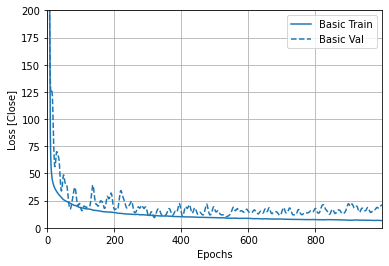

In [17]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 200])
plt.ylabel('Loss [Close]')

Text(0, 0.5, 'MSE [Close^2]')

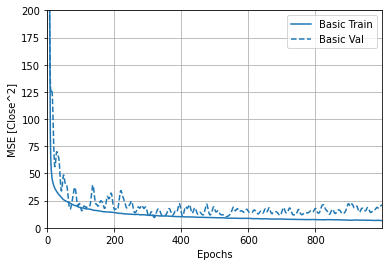

In [18]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 200])
plt.ylabel('MSE [Close^2]')

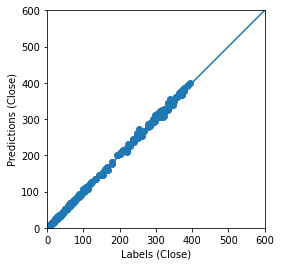

In [19]:
test_dataset['Pred'] = model.predict(normed_test_data).flatten()
test_dataset['labels']=test_labels

a = plt.axes(aspect='equal')
plt.scatter(test_dataset['labels'], test_dataset['Pred'])
plt.xlabel('Labels (Close)')
plt.ylabel('Predictions (Close)')
lims = [0, 600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

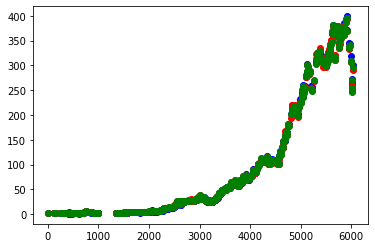

In [20]:
plt.scatter(test_dataset.index,test_dataset.Pred, color="blue")
plt.scatter(test_dataset.index,test_dataset.labels, color="red")
plt.scatter(test_dataset.index,test_dataset.ON, color="green")
#new=test_dataset.index+1
#lims = [500, 550]
#plt.ylim(lims)

In [0]:
test_dataset['Height'] = abs(test_dataset['labels']-test_dataset['ON'])

In [22]:
test_dataset['Long'] = np.where(((test_dataset['labels']>=test_dataset['ON']) & ((test_dataset['Pred']>= test_dataset['ON']-(0.3*test_dataset['Height']))&(test_dataset['Pred']<= test_dataset['ON']+(0.6*test_dataset['Height'])))) 
                     , 1, np.nan)
test_dataset[test_dataset.Long==1].shape[0]

42

In [23]:
test_dataset['Short'] = np.where(((test_dataset['labels']<=test_dataset['Pred']) & ((test_dataset['Pred']>= test_dataset['ON']-(0.6*test_dataset['Height']))&(test_dataset['Pred']<= test_dataset['ON']+(0.3*test_dataset['Height'])))) 
                     , 1, np.nan)
test_dataset[test_dataset.Short==1].shape[0]

46

In [24]:
Accuracy=(test_dataset[test_dataset.Short==1].shape[0]+test_dataset[test_dataset.Long==1].shape[0])/len(test_dataset)
Accuracy

0.16326530612244897

In [25]:
test_dataset['Long'] = np.where(((test_dataset['labels']>=test_dataset['ON']) & (test_dataset['Pred']>= test_dataset['ON'])) 
                     , 1, np.nan)
test_dataset[test_dataset.Long==1].shape[0]

96

In [26]:
test_dataset['Short'] = np.where(((test_dataset['labels']<=test_dataset['ON']) & (test_dataset['Pred']<= test_dataset['ON'])) 
                     , 1, np.nan)
test_dataset[test_dataset.Short==1].shape[0]

212

In [27]:
Accuracy=(test_dataset[test_dataset.Short==1].shape[0]+test_dataset[test_dataset.Long==1].shape[0])/len(test_dataset)
Accuracy

0.5714285714285714